In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('train.csv')
df.head(5)

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0        51.968828  ...          2.257143       2.213364           2.219783   
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0         1.368922             1.066221              1           1.085714   
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   

   std_Valence  wtd_std_Valence  critical_temp  
0     0.433013         0.437059           29.0  
1     0.632456         0.468606           26.0  
2     0.433013         0.444697           19.0  
3     0.433013         0.440952           22.0  
4     0.433013         0.428809           23.0  

[5 rows x 82 columns]

In [4]:
df.shape

(21263, 82)

In [5]:
df.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

## 2. Relevant Features

In [6]:
relevant_features= abs(df.corr()['critical_temp'])[abs(df.corr()['critical_temp'])>0.5]

In [7]:
features=['number_of_elements','wtd_entropy_atomic_mass','entropy_fie','range_fie',
          'wtd_std_fie','wtd_entropy_atomic_radius','range_atomic_radius','wtd_std_atomic_radius',
          'gmean_Density','wtd_entropy_FusionHeat','wtd_std_ThermalConductivity','wtd_mean_Valence',
          'entropy_Valence','critical_temp']
df_new=df[features]
df_new.head(10)

number_of_elements  wtd_entropy_atomic_mass  entropy_fie  range_fie  \
0                   4                 1.062396     1.305967      810.6   
1                   5                 1.057755     1.544145      810.6   
2                   4                 0.975980     1.305967      810.6   
3                   4                 1.022291     1.305967      810.6   
4                   4                 1.129224     1.305967      810.6   
5                   4                 1.225203     1.305967      810.6   
6                   4                 1.316857     1.305967      810.6   
7                   4                 0.943560     1.313008      772.0   
8                   4                 0.981880     1.313008      772.0   
9                   4                 1.016495     1.313008      772.0   

   wtd_std_fie  wtd_entropy_atomic_radius  range_atomic_radius  \
0   355.562967                   1.207040                  205   
1   354.963511                   1.204115                  205   
2   354.804183                   1.132547                  205   
3   355.183884                   1.173033                  205   
4   356.319281                   1.261194                  205   
5   357.824566                   1.331339                  205   
6   361.545642                   1.367279                  205   
7   353.894217                   1.121818                  171   
8   353.819831                   1.160060                  171   
9   353.745421                   1.192734                  171   

   wtd_std_atomic_radius  gmean_Density  wtd_entropy_FusionHeat  \
0              69.235569     724.953211                0.994998   
1              68.008817    1237.095080                1.073094   
2              67.797712     724.953211                0.927479   
3              68.521665     724.953211                0.964031   
4              70.634448     724.953211                1.044970   
5              73.324134     724.953211                1.111850   
6              79.500995     724.953211                1.156821   
7              66.848571     674.484751                0.927479   
8              67.111458     674.484751                0.964031   
9              67.372883     674.484751                0.994998   

   wtd_std_ThermalConductivity  wtd_mean_Valence  entropy_Valence  \
0                   138.517163          2.257143         1.368922   
1                   139.630922          2.257143         1.557113   
2                   138.540613          2.271429         1.368922   
3                   138.528893          2.264286         1.368922   
4                   138.493671          2.242857         1.368922   
5                   138.446567          2.214286         1.368922   
6                   138.328090          2.142857         1.368922   
7                   138.480008          2.271429         1.368922   
8                   138.437714          2.264286         1.368922   
9                   138.395229          2.257143         1.368922   

   critical_temp  
0           29.0  
1           26.0  
2           19.0  
3           22.0  
4           23.0  
5           23.0  
6           11.0  
7           33.0  
8           36.0  
9           31.0

In [8]:
df_new.corr()

number_of_elements  wtd_entropy_atomic_mass  \
number_of_elements                     1.000000                 0.881845   
wtd_entropy_atomic_mass                0.881845                 1.000000   
entropy_fie                            0.973195                 0.891982   
range_fie                              0.781227                 0.744625   
wtd_std_fie                            0.717831                 0.731250   
wtd_entropy_atomic_radius              0.904121                 0.961464   
range_atomic_radius                    0.768060                 0.774054   
wtd_std_atomic_radius                  0.695089                 0.737633   
gmean_Density                         -0.630504                -0.596833   
wtd_entropy_FusionHeat                 0.860479                 0.873931   
wtd_std_ThermalConductivity            0.665580                 0.684497   
wtd_mean_Valence                      -0.648551                -0.644336   
entropy_Valence                        0.967832                 0.897636   
critical_temp                          0.601069                 0.626930   

                             entropy_fie  range_fie  wtd_std_fie  \
number_of_elements              0.973195   0.781227     0.717831   
wtd_entropy_atomic_mass         0.891982   0.744625     0.731250   
entropy_fie                     1.000000   0.767796     0.708893   
range_fie                       0.767796   1.000000     0.940281   
wtd_std_fie                     0.708893   0.940281     1.000000   
wtd_entropy_atomic_radius       0.920192   0.797663     0.781457   
range_atomic_radius             0.773937   0.908734     0.887192   
wtd_std_atomic_radius           0.710635   0.871711     0.922258   
gmean_Density                  -0.624222  -0.815491    -0.795222   
wtd_entropy_FusionHeat          0.864214   0.657066     0.653455   
wtd_std_ThermalConductivity     0.650649   0.670738     0.709665   
wtd_mean_Valence               -0.624606  -0.731329    -0.754516   
entropy_Valence                 0.992726   0.782544     0.736856   
critical_temp                   0.567817   0.600790     0.582013   

                             wtd_entropy_atomic_radius  range_atomic_radius  \
number_of_elements                            0.904121             0.768060   
wtd_entropy_atomic_mass                       0.961464             0.774054   
entropy_fie                                   0.920192             0.773937   
range_fie                                     0.797663             0.908734   
wtd_std_fie                                   0.781457             0.887192   
wtd_entropy_atomic_radius                     1.000000             0.812398   
range_atomic_radius                           0.812398             1.000000   
wtd_std_atomic_radius                         0.781488             0.958004   
gmean_Density                                -0.654177            -0.815835   
wtd_entropy_FusionHeat                        0.907860             0.666575   
wtd_std_ThermalConductivity                   0.675969             0.736142   
wtd_mean_Valence                             -0.660216            -0.756621   
entropy_Valence                               0.919184             0.796085   
critical_temp                                 0.603494             0.653759   

                             wtd_std_atomic_radius  gmean_Density  \
number_of_elements                        0.695089      -0.630504   
wtd_entropy_atomic_mass                   0.737633      -0.596833   
entropy_fie                               0.710635      -0.624222   
range_fie                                 0.871711      -0.815491   
wtd_std_fie                               0.922258      -0.795222   
wtd_entropy_atomic_radius                 0.781488      -0.654177   
range_atomic_radius                       0.958004      -0.815835   
wtd_std_atomic_radius                     1.000000      -0.798778   
gmean_Density                            -0.798778       1.0

## 3. Visualisation

<AxesSubplot: >

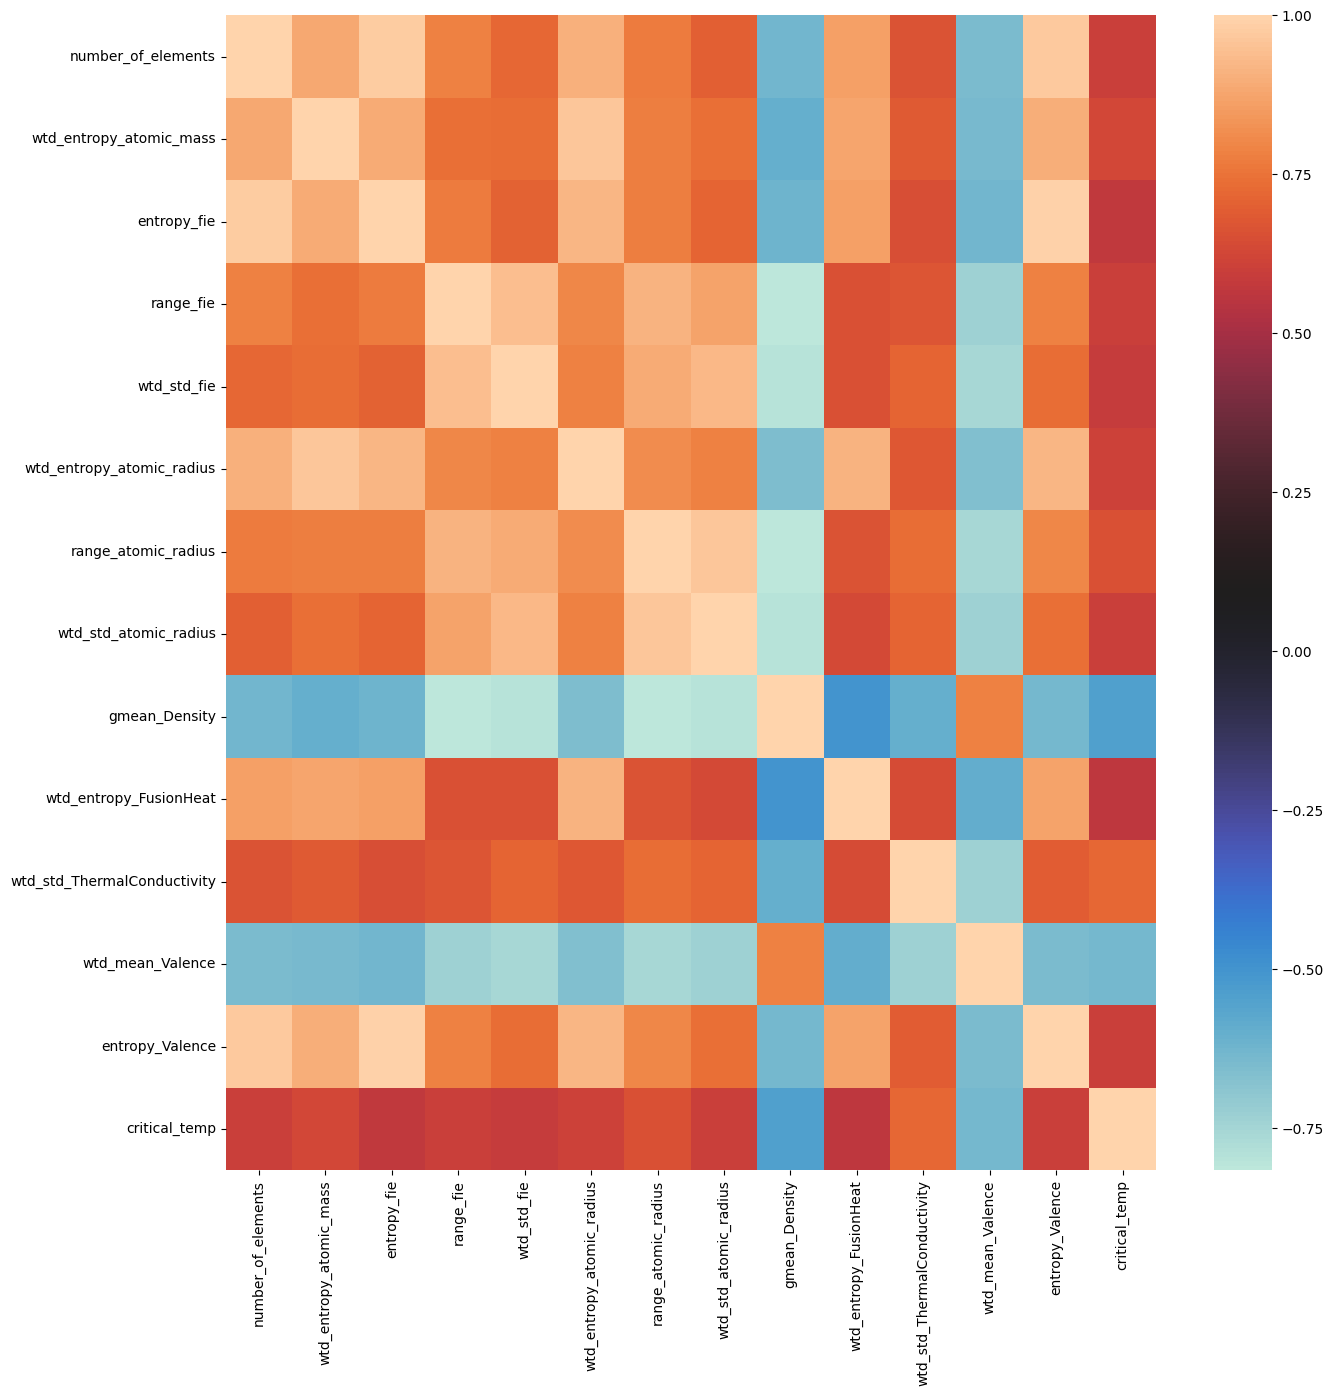

In [9]:
plt.figure(figsize=(15,15))
corr = df_new.corr()
sns.heatmap(corr,cmap='icefire')

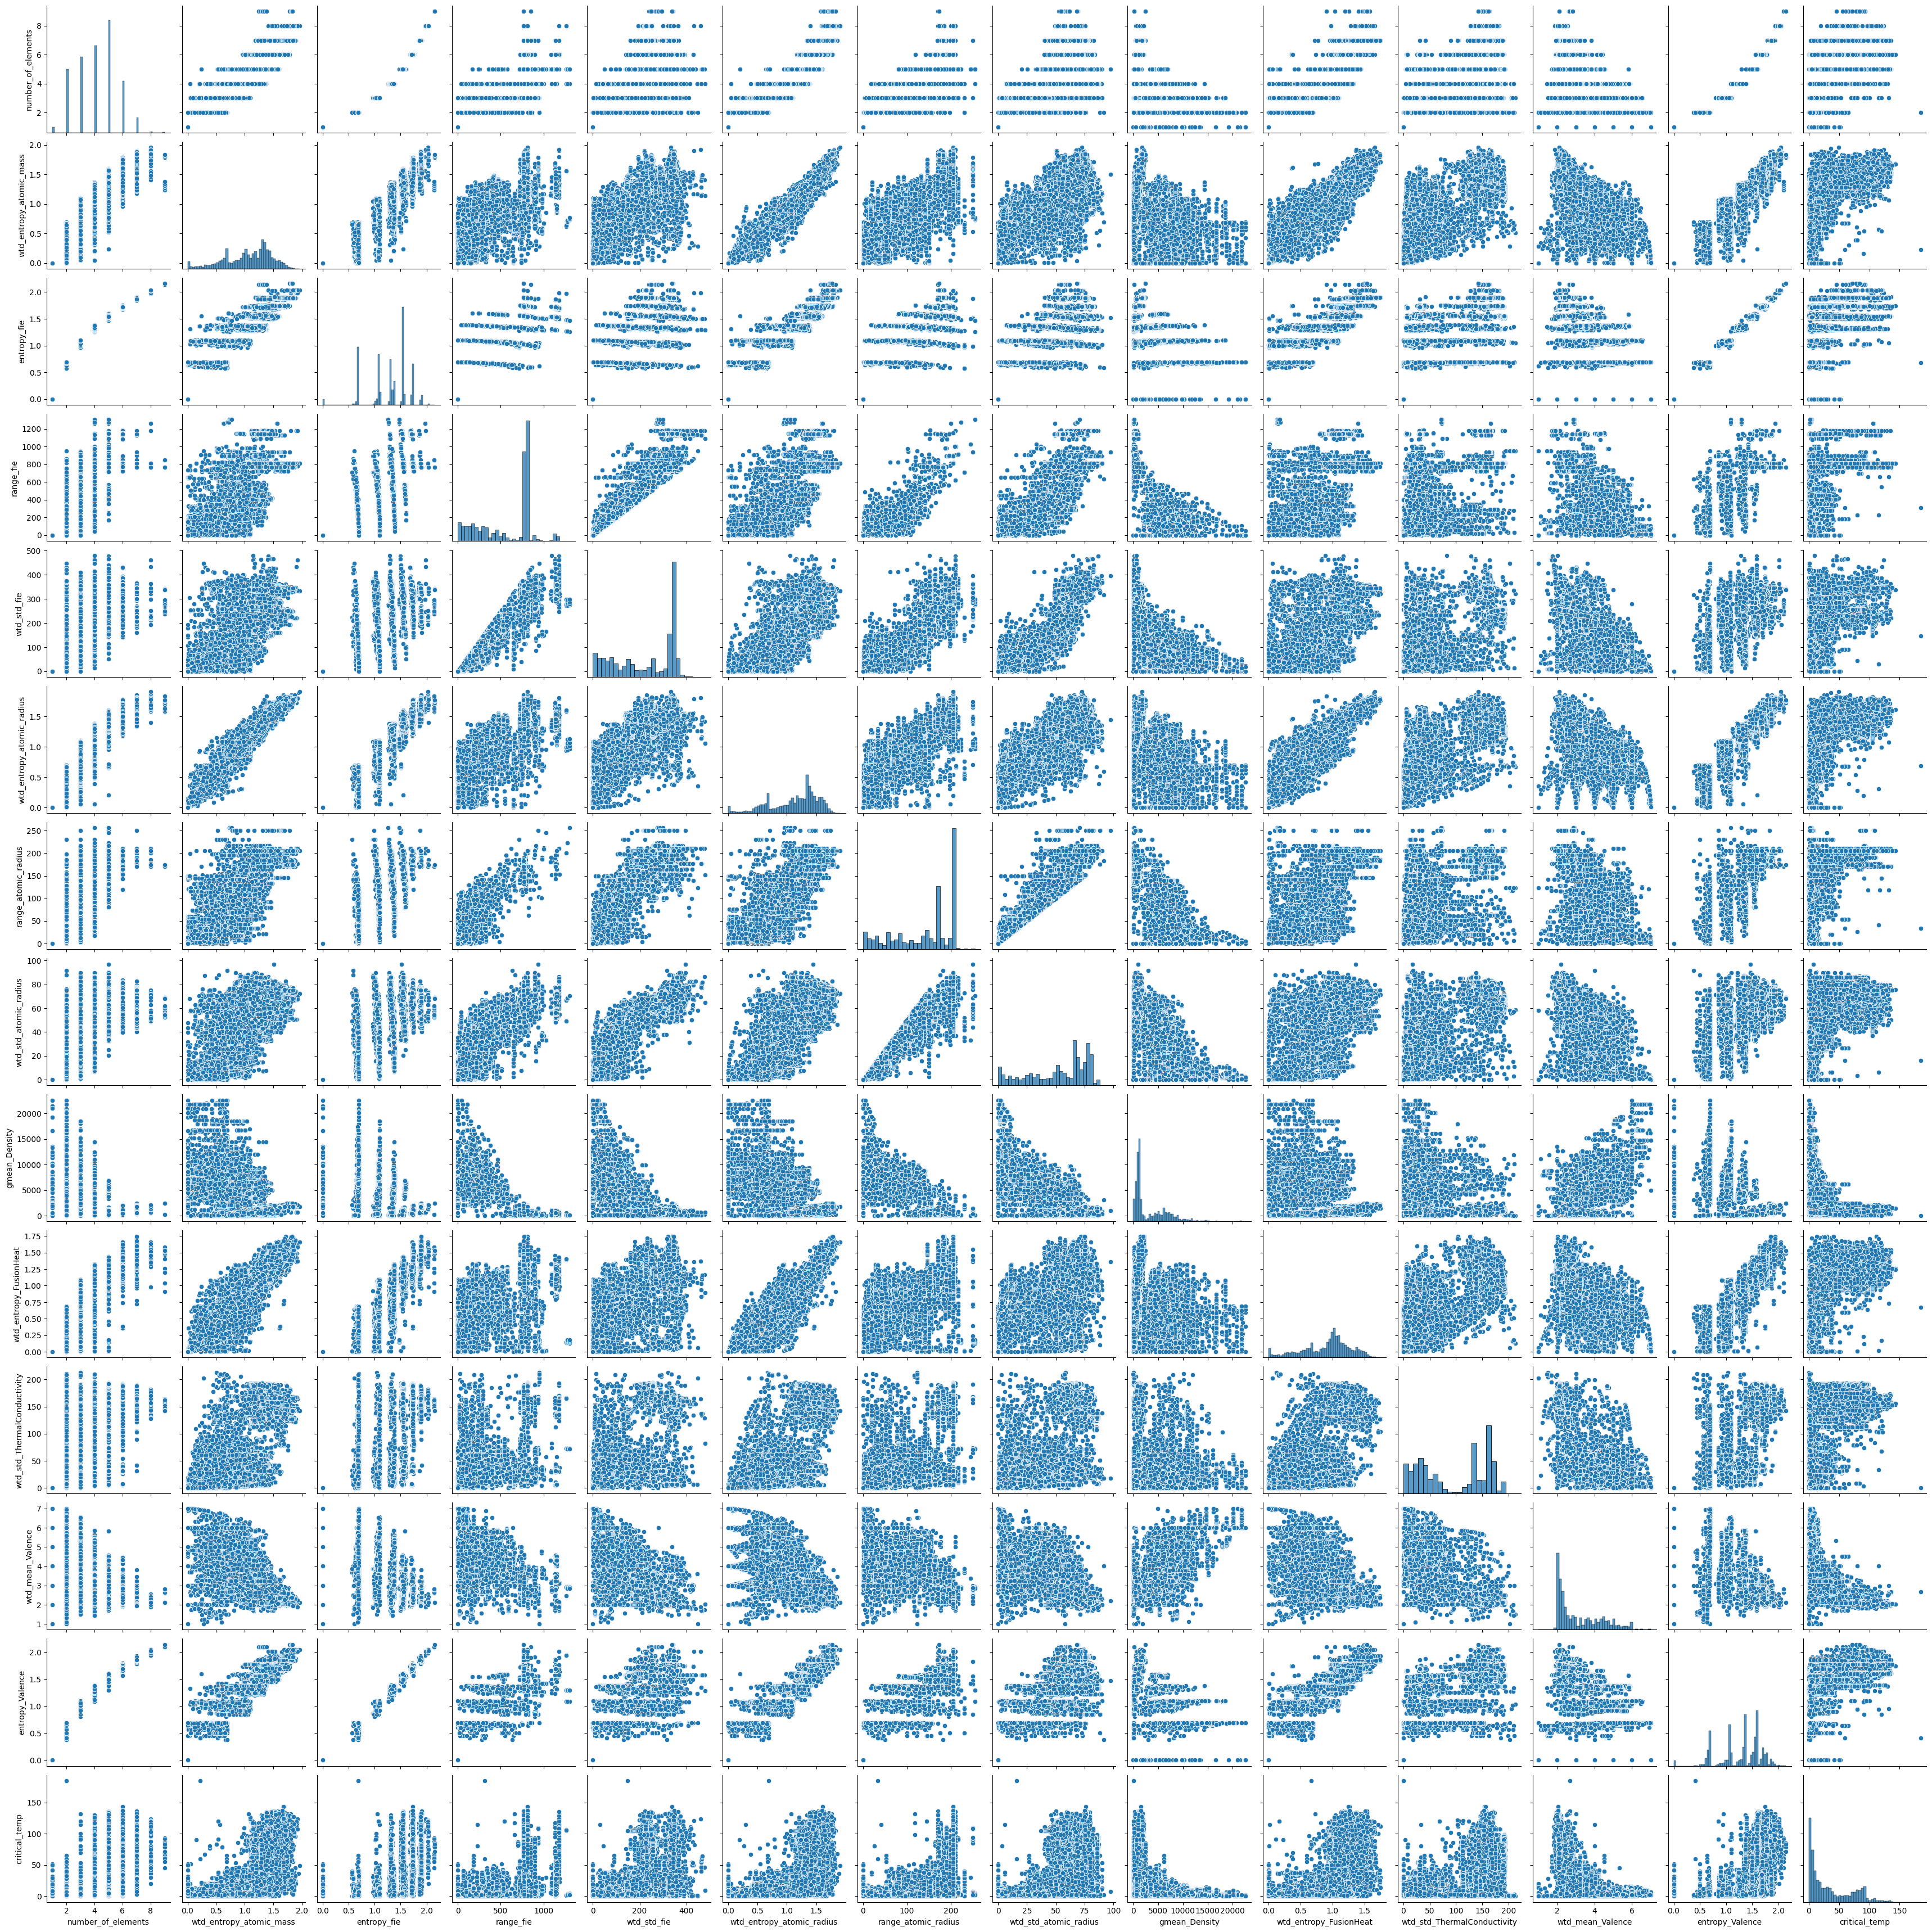

In [10]:
sns.pairplot(df_new)

## 4. Model Training

In [11]:
X=df_new.drop(['critical_temp'],axis=1)
y=df_new['critical_temp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 4.1 Linear Regression

In [12]:
LR=LinearRegression()
error_df=list()

LR=LR.fit(X_train,y_train)
y_train_pred=LR.predict(X_train)
y_test_pred=LR.predict(X_test)

error_df.append(pd.Series({'train': r2_score(y_train, y_train_pred),
                           'test' : r2_score(y_test,  y_test_pred)},
                           name='no enc'))

linearRegression_r2=r2_score(y_test,  y_test_pred)
error_df

[train    0.607233
 test     0.596492
 Name: no enc, dtype: float64]

### 4.2 Linear Regression with Scaling

In [13]:
scalers = {'standard': StandardScaler(),
           'minmax': MinMaxScaler(),
           'maxabs': MaxAbsScaler()}
mask = X_train.dtypes == np.float
errors = {}
lists=[]
float_columns = X_train.columns[mask]
for scaler_label, scaler in scalers.items():
        trainingset = X_train.copy() 
        testset = X_test.copy()
        trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
        testset[float_columns] = scaler.transform(testset[float_columns])
        regression=LR.fit(trainingset, y_train)
        predictions = LR.predict(testset)
        key = scaler_label + 'scaling'
        errors[key] = r2_score(y_test, predictions)
        coeff=regression.coef_
        lists.append(coeff)
for key, error_val in errors.items():
    print(key, error_val)

standardscaling 0.596491569411808
minmaxscaling 0.5964915694118059
maxabsscaling 0.5964915694118074


C:\Users\Sakshi\AppData\Local\Temp\ipykernel_11428\1779246938.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = X_train.dtypes == np.float


### 4.3: Polynomial regression

In [14]:
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X_train)
predict_ = poly.fit_transform(X_test)

clf = linear_model.LinearRegression()
clf.fit(X_, y_train)
y_pred=clf.predict(predict_)
polynomial_r2=r2_score(y_test,y_pred)
polynomial_r2

0.7086494789557141

### 4.4: Ridge Regression

In [15]:
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_r2 = r2_score(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_r2)

0.05 0.5964924126786904


### 4.5: Lasso Regression

In [19]:
alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=int(5e4),
                  cv=3).fit(X_train, y_train)

lassoCV_r2 = r2_score(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_r2) 

0.0001 0.5964903425400725


### 4.6: Elastic Net

In [20]:
l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=int(1e4)).fit(X_train, y_train)
elasticNetCV_r2 = r2_score(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_r2)

1e-05 0.7000000000000001 0.5964922491209014


### Comparision of different Regression Model

In [21]:
rmse_vals = [linearRegression_r2 ,polynomial_r2, ridgeCV_r2, lassoCV_r2, elasticNetCV_r2]

labels = ['Linear','Polynomial', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'R2 Score'}, inplace=1)
rmse_df

R2 Score
Linear      0.596492
Polynomial  0.708649
Ridge       0.596492
Lasso       0.596490
ElasticNet  0.596492

### 4.8: Decision Tree Regressor

In [22]:
max_depths = [30, 50, 70, 90]
min_samples_leafs = [2, 5, 10]
test_results = []
for max_depth in max_depths:
    for min_samples_leaf in min_samples_leafs: 
        dt = DecisionTreeRegressor(max_depth=max_depth,min_samples_leaf=min_samples_leaf,random_state=42)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        r2=r2_score(y_test,y_pred)
        test_results.append(r2)
        print(" Max depth: ",max_depth," Min leafs: ",min_samples_leaf," R2 Score:", r2)

 Max depth:  30  Min leafs:  2  R2 Score: 0.8658459865467851
 Max depth:  30  Min leafs:  5  R2 Score: 0.8699979986164404
 Max depth:  30  Min leafs:  10  R2 Score: 0.8586004186117363
 Max depth:  50  Min leafs:  2  R2 Score: 0.8644459684627019
 Max depth:  50  Min leafs:  5  R2 Score: 0.8699979986164404
 Max depth:  50  Min leafs:  10  R2 Score: 0.8586004186117363
 Max depth:  70  Min leafs:  2  R2 Score: 0.8644459684627019
 Max depth:  70  Min leafs:  5  R2 Score: 0.8699979986164404
 Max depth:  70  Min leafs:  10  R2 Score: 0.8586004186117363
 Max depth:  90  Min leafs:  2  R2 Score: 0.8644459684627019
 Max depth:  90  Min leafs:  5  R2 Score: 0.8699979986164404
 Max depth:  90  Min leafs:  10  R2 Score: 0.8586004186117363


### 4.9:Random Forest Regressor


In [23]:
rfr=RandomForestRegressor(random_state=42)
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)
r2_score(y_test,y_pred)

0.9068491198402164

### 4.10 Hyperparameter Tuning for Random Forest

In [25]:
n_estimators = [100, 200, 500]
max_depths = [30, 50, 70]
min_samples_leafs = [2, 5, 10]
test_results = []
for estimator in n_estimators:
    for max_depth in max_depths:
        for min_samples_leaf in min_samples_leafs: 
            rf = RandomForestRegressor(n_estimators=estimator,max_depth=max_depth,min_samples_leaf=min_samples_leaf, n_jobs=-1,random_state=42)
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            r2=r2_score(y_test,y_pred)
            test_results.append(r2)
            print("Number of estimators: ",estimator," Max depth: ",max_depth," Min leafs: ",min_samples_leaf," R2 Score:", r2)

Number of estimators:  100  Max depth:  30  Min leafs:  2  R2 Score: 0.9058939807064974
Number of estimators:  100  Max depth:  30  Min leafs:  5  R2 Score: 0.898904584347018
Number of estimators:  100  Max depth:  30  Min leafs:  10  R2 Score: 0.8871339730581675
Number of estimators:  100  Max depth:  50  Min leafs:  2  R2 Score: 0.9060172304876948
Number of estimators:  100  Max depth:  50  Min leafs:  5  R2 Score: 0.8989115461484539
Number of estimators:  100  Max depth:  50  Min leafs:  10  R2 Score: 0.8871339730581675
Number of estimators:  100  Max depth:  70  Min leafs:  2  R2 Score: 0.9060172304876948
Number of estimators:  100  Max depth:  70  Min leafs:  5  R2 Score: 0.8989115461484539
Number of estimators:  100  Max depth:  70  Min leafs:  10  R2 Score: 0.8871339730581675
Number of estimators:  200  Max depth:  30  Min leafs:  2  R2 Score: 0.9062789132829404
Number of estimators:  200  Max depth:  30  Min leafs:  5  R2 Score: 0.8991027737192129
Number of estimators:  200  Ma

In [26]:
n_estimators = [200,300,400,500,600,700]
max_depths = [30, 50, 70, 90]
test_results = []
for estimator in n_estimators:
    for max_depth in max_depths:
        rf = RandomForestRegressor(n_estimators=estimator,max_depth=max_depth,min_samples_leaf=2, n_jobs=-1,random_state=42)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        r2=r2_score(y_test,y_pred)
        test_results.append(r2)
        print("Number of estimators: ",estimator," Max depth: ",max_depth," R2 Score:", r2)

Number of estimators:  200  Max depth:  30  R2 Score: 0.9062789132829404
Number of estimators:  200  Max depth:  50  R2 Score: 0.9063248122878416
Number of estimators:  200  Max depth:  70  R2 Score: 0.9063248122878416
Number of estimators:  200  Max depth:  90  R2 Score: 0.9063248122878416
Number of estimators:  300  Max depth:  30  R2 Score: 0.9065425164633452
Number of estimators:  300  Max depth:  50  R2 Score: 0.9066087250418072
Number of estimators:  300  Max depth:  70  R2 Score: 0.9066087250418072
Number of estimators:  300  Max depth:  90  R2 Score: 0.9066087250418072
Number of estimators:  400  Max depth:  30  R2 Score: 0.9065919617143339
Number of estimators:  400  Max depth:  50  R2 Score: 0.9066647238608887
Number of estimators:  400  Max depth:  70  R2 Score: 0.9066647238608887
Number of estimators:  400  Max depth:  90  R2 Score: 0.9066647238608887
Number of estimators:  500  Max depth:  30  R2 Score: 0.906519977572941
Number of estimators:  500  Max depth:  50  R2 Score

## 5. Final Model and Conclusion 

In [27]:
rf = RandomForestRegressor(n_estimators=400, random_state=42)
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)
r2_score(y_test,y_pred)

0.9068491198402164

Out of the 81 features we only used those which had an absolute correlation value greater than 0.5. the features used were 'number_of_elements','wtd_entropy_atomic_mass','entropy_fie','range_fie','wtd_std_fie','wtd_entropy_atomic_radius','range_atomic_radius','wtd_std_atomic_radius','gmean_Density','wtd_entropy_FusionHeat','wtd_std_ThermalConductivity','wtd_mean_Valence','entropy_Valence',and'critical_temp'.

Out of all the regression models the best R2-score was 0.7 using polynomial regression.
Best R2-score from the Decision Tree Regressor was about 0.87 having max_depth:50 and min_leafs:5
For the Random Forest Regressor the best R2-score of about 0.907 on the test set was obtained n_estimators: 400